In [225]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import pyplot

# Pizza Order Details

### Explanation:
The data represents detailed information about various pizza orders placed on January 1, 2015. Each row corresponds to a specific order and includes the following columns:

- **order_details_id**: A unique identifier for each order detail.
- **order_id**: The ID of the order.
- **pizza_id**: The unique identifier of the pizza.
- **quantity**: The number of pizzas ordered.
- **order_date**: The date the order was placed.
- **order_time**: The time the order was placed.
- **unit_price**: The price of a single pizza.
- **total_price**: The total price for the quantity of pizzas ordered.
- **pizza_size**: The size of the pizza (S = Small, M = Medium, L = Large).
- **pizza_category**: The category or type of pizza (e.g., Classic, Veggie, Supreme, Chicken).
- **pizza_ingredients**: The ingredients used in the pizza.
- **pizza_name**: The name of the pizza.

The data provides insights into the types of pizzas ordered, their sizes, prices, and the ingredients used. This can be useful for analyzing customer preferences, popular pizza types, and pricing strategies.

# So we have the data of the total sales in the year 2015 and we will build a prediction model predicting sales using this data 

In [226]:
df=pd.read_excel(r"C:\Users\war machine rocks\OneDrive\Desktop\Data Model - Pizza Sales.xlsx")

In [227]:
df.head()
# 5 rows of the dataset to check rows and columns 



,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,Sales,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [228]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'Sales', 'pizza_size', 'pizza_category',
       'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [229]:
print('total number of items',df['pizza_name'].value_counts().count())
df['pizza_name'].unique()

# total category of pizza is 32 

total number of items 32


array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [230]:
pizza_sales = df.groupby('pizza_name')['Sales'].sum().reset_index()

# Sort pizzas by total sales in descending order and get top 5
top_5_pizzas = pizza_sales.sort_values(by='Sales', ascending=False).head(5)

# Get the names of the top 5 best selling pizzas
top_5_pizza_names = top_5_pizzas['pizza_name'].tolist()

# Print the top 5 best selling pizzas
print("Top 5 best selling pizzas:")
for i, pizza_name in enumerate(top_5_pizza_names, 1):
    print(f"{i}. {pizza_name}")

Top 5 best selling pizzas:
1. The Thai Chicken Pizza
2. The Barbecue Chicken Pizza
3. The California Chicken Pizza
4. The Classic Deluxe Pizza
5. The Spicy Italian Pizza


## removing unwanted columns

In [231]:
df.drop(['order_details_id','order_id','pizza_id','order_time','pizza_ingredients','pizza_name'],axis=1,inplace=True)

In [232]:
df.head()
# unwanted columns have been removed

,quantity,order_date,unit_price,Sales,pizza_size,pizza_category
0,1,2015-01-01,13.25,13.25,M,Classic
1,1,2015-01-01,16.00,16.00,M,Classic
2,1,2015-01-01,18.50,18.50,L,Veggie
3,1,2015-01-01,20.75,20.75,L,Supreme
4,1,2015-01-01,16.00,16.00,M,Veggie


# Null value imputation

In [233]:
df.isnull().sum()

# as we can see there are no null values in any column 

quantity          0
order_date        0
unit_price        0
Sales             0
pizza_size        0
pizza_category    0
dtype: int64

making a new column of month and quarter to check the monthly sales and quarterly sales 

In [234]:
df['order_date'] = pd.to_datetime(df['order_date'])
# Create a new column for the month
df['month'] = df['order_date'].dt.month

# Create a new column for the quarter
df['quarter'] = df['order_date'].dt.quarter

In [235]:
print(df['quarter'].value_counts())
print(df['month'].value_counts())

# quarters and months 

quarter
2    12331
1    12234
3    12214
4    11841
Name: count, dtype: int64
month
7     4301
5     4239
3     4186
11    4185
1     4156
8     4094
4     4067
6     4025
2     3892
12    3859
9     3819
10    3797
Name: count, dtype: int64


# plotting charts to see sales in different criterias 

In [236]:
import plotly.express as px

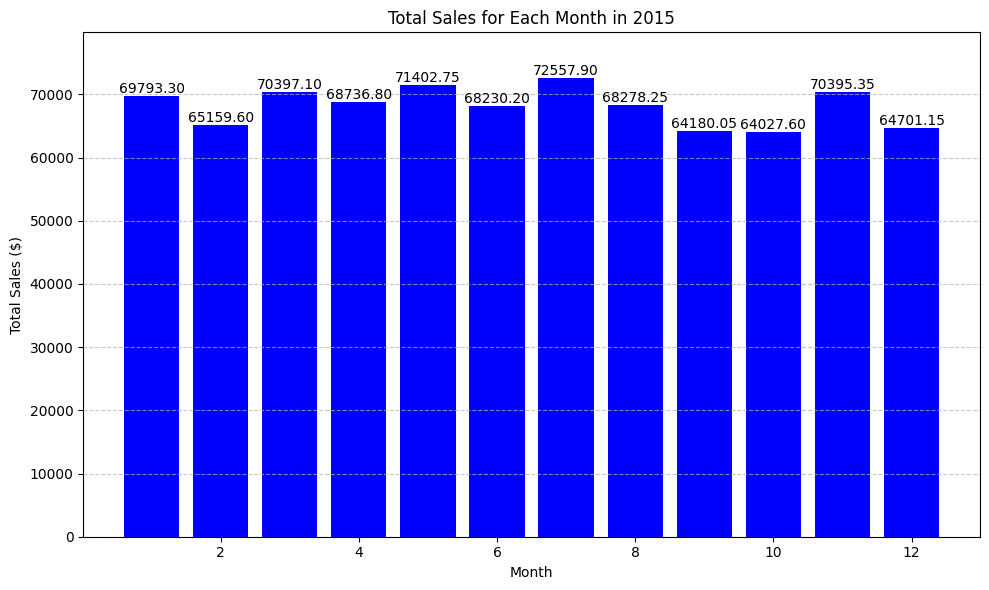

In [264]:
# Group by month and calculate total sales
monthly_sales = df.groupby('month')['Sales'].sum().reset_index()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales['month'], monthly_sales['Sales'], color='blue')

# Add text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales for Each Month in 2015')
plt.ylim(0, max(monthly_sales['Sales']) * 1.1)  # Set y-axis limit slightly above max sales for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

We can see the highest sales is in the month of july 

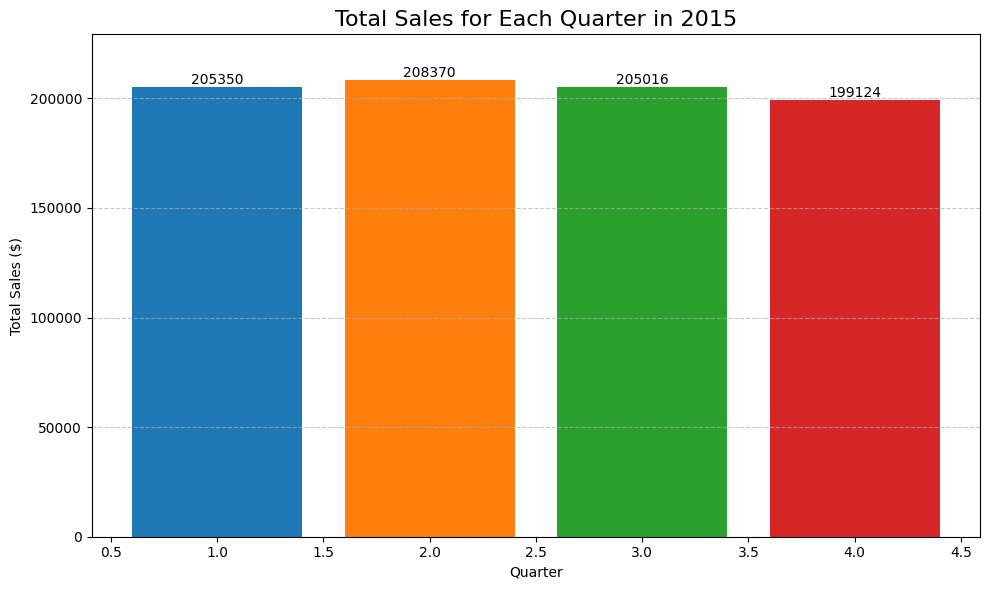

In [266]:
quarterly_sales = df.groupby('quarter')['Sales'].sum().reset_index()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(quarterly_sales['quarter'], quarterly_sales['Sales'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Add labels and values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales for Each Quarter in 2015', fontsize=16)
plt.ylim(0, max(quarterly_sales['Sales']) * 1.1)  # Set y-axis limit slightly above max sales for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

There is a slight difference in the 2nd quarter although the total sale is stable througout the year

In [239]:
# Calculate total sales by pizza size
total_sales_by_size = df.groupby('pizza_size')['Sales'].sum().reset_index()

# Plotting with Plotly, using a colorful palette and displaying text on bars
fig = px.bar(total_sales_by_size, x='pizza_size', y='Sales',
             title='Total Sales of Pizzas by Size',
             labels={'pizza_size': 'Pizza Size', 'Sales': 'Total Sales ($)'},
             color_discrete_sequence=colors,
             text='Sales',  # Display sales value on top of each bar
             )

# Customize layout to prevent text from going outside the chart
fig.update_traces(texttemplate='%{text:.2s}',  # Limiting the displayed text to 2 characters
                  textposition='outside',  # Position text outside the bars
                  textfont_size=12,  # Adjust font size of the displayed text
                  )

fig.update_layout(uniformtext_minsize=8,  # Minimum font size for text
                  uniformtext_mode='hide',  # Hide text if it's too large
                  )

fig.show()

## The highest selling pizzas are large pizzas

In [240]:
df.head()

,quantity,order_date,unit_price,Sales,pizza_size,pizza_category,month,quarter
0,1,2015-01-01,13.25,13.25,M,Classic,1,1
1,1,2015-01-01,16.00,16.00,M,Classic,1,1
2,1,2015-01-01,18.50,18.50,L,Veggie,1,1
3,1,2015-01-01,20.75,20.75,L,Supreme,1,1
4,1,2015-01-01,16.00,16.00,M,Veggie,1,1


In [241]:
# checking how many categories we have
df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

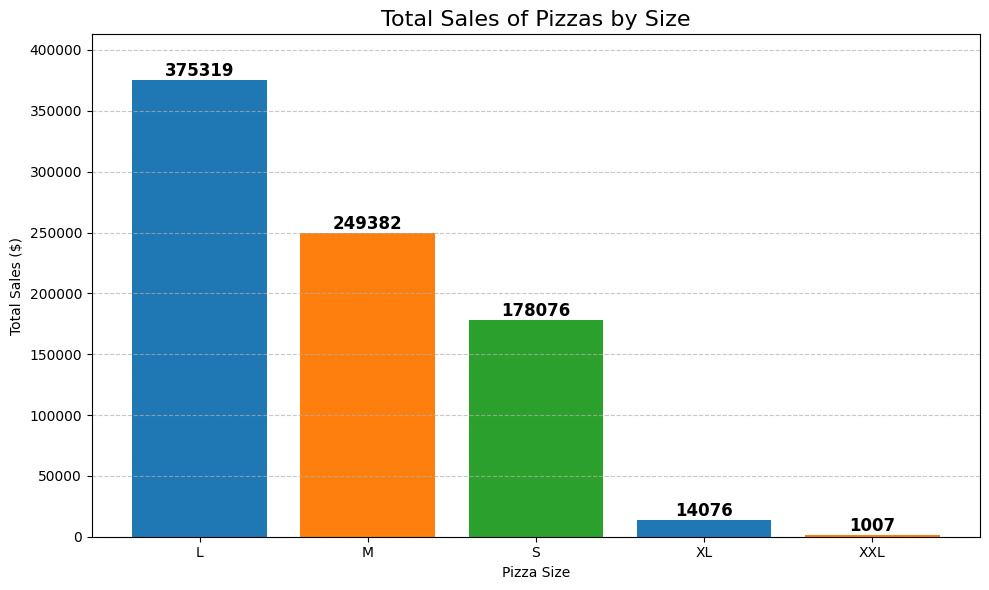

In [268]:
#Calculate total sales by pizza size
total_sales_by_size = df.groupby('pizza_size')['Sales'].sum().reset_index()

# Define colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(total_sales_by_size['pizza_size'], total_sales_by_size['Sales'], color=colors)

# Add labels and values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales of Pizzas by Size', fontsize=16)
plt.ylim(0, max(total_sales_by_size['Sales']) * 1.1)  # Set y-axis limit slightly above max sales for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

## Assumption of linear regression model is the target variable should be normally distributed let's see 


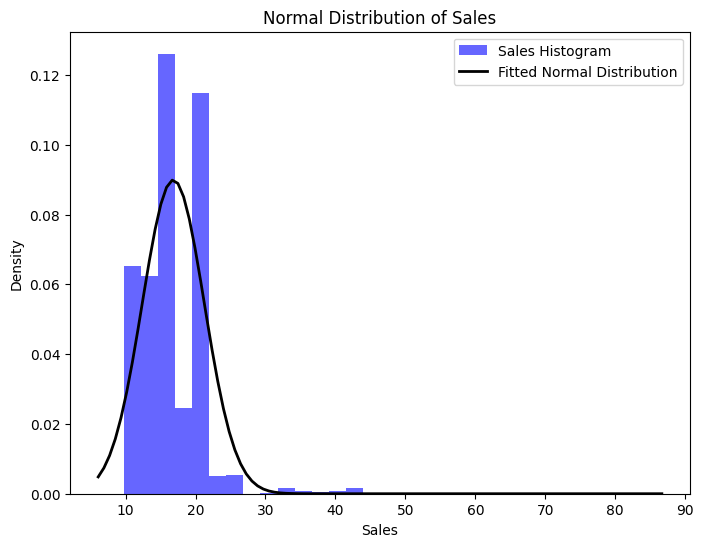

In [243]:
from scipy.stats import norm

# Assuming 'df' is your DataFrame containing the data
# Plotting a histogram of 'Sales' with a fitted normal distribution curve

# Extract 'Sales' data from your DataFrame
sales_data = df['Sales']

# Calculate mean and standard deviation of 'Sales'
mu, sigma = np.mean(sales_data), np.std(sales_data)

# Create a figure and axis for the plot
plt.figure(figsize=(8, 6))

# Plot the histogram of 'Sales'
plt.hist(sales_data, bins=30, density=True, alpha=0.6, color='blue', label='Sales Histogram')

# Plot the fitted normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Normal Distribution of Sales')
plt.legend()

# Show plot
plt.show()

# Histogram Analysis:

The histogram of sales is skewed to the right, indicating a positive skewness.
There are noticeable peaks around the sales values of 16 and 18.5, with a long tail extending towards higher sales values.
Fitted Normal Distribution:

The black line represents the fitted normal distribution, which appears to be a poor fit for the actual sales data. The normal distribution should have a bell-shaped curve that closely matches the histogram.
The histogram data shows significant deviation from the fitted normal curve, especially in the tails and the peaks.
In conclusion, the sales data are not normally distributed, as evidenced by the skewness and the poor fit of the normal distribution curve to the histogram. For linear regression, the assumption of normally distributed residuals is crucial, and you may need to consider transforming the data or using a different model if the residuals do not meet this assumption.

## checking the linearity between the data 


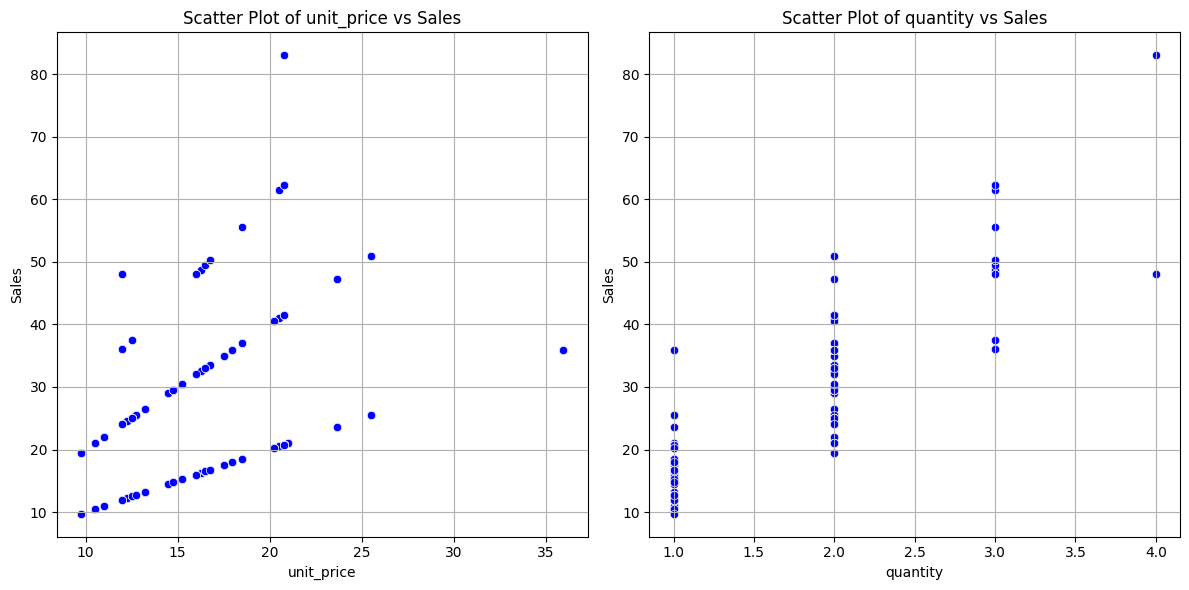

In [244]:
# List of independent variables to check against the target variable 'Sales'
independent_vars = ["unit_price", "quantity"]

# Plot scatter plots
plt.figure(figsize=(12, 6))

for i, var in enumerate(independent_vars):
    plt.subplot(1, len(independent_vars), i+1)
    sns.scatterplot(x=df[var], y=df["Sales"], color="blue")
    plt.title(f"Scatter Plot of {var} vs Sales")
    plt.xlabel(var)
    plt.ylabel("Sales")
    plt.grid(True)

plt.tight_layout()
plt.show()

## we can see there is more linearity between unit price  

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset (assuming 'df' is your DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Assuming you've preprocessed your data and selected relevant features
X = df[['pizza_size', 'pizza_category', 'unit_price']]  # Example independent variables
y = df['Sales']  # Target variable (Sales)

# Encode categorical variables if needed (e.g., using one-hot encoding)
X_encoded = pd.get_dummies(X)

In [246]:
X_encoded

,unit_price,pizza_size_L,pizza_size_M,pizza_size_S,pizza_size_XL,pizza_size_XXL,pizza_category_Chicken,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie
0,13.25,False,True,False,False,False,False,True,False,False
1,16.00,False,True,False,False,False,False,True,False,False
2,18.50,True,False,False,False,False,False,False,False,True
3,20.75,True,False,False,False,False,False,False,True,False
4,16.00,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
48615,16.75,False,True,False,False,False,True,False,False,False
48616,17.95,True,False,False,False,False,False,False,False,True
48617,12.00,False,False,True,False,False,False,True,False,False
48618,20.25,True,False,False,False,False,False,False,False,True


In [247]:
y

0        13.25
1        16.00
2        18.50
3        20.75
4        16.00
         ...  
48615    16.75
48616    17.95
48617    12.00
48618    20.25
48619    12.75
Name: Sales, Length: 48620, dtype: float64

In [248]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

Understanding the importance of data partitioning is fundamental in machine learning model development. When we refer to taking "80 percent of the data to train the model and 20 percent of the data to test the model," we are adhering to a critical practice known as data splitting.

Data splitting involves dividing our dataset into two distinct subsets:

Traiing Set: This subset, typically comprising 80% of our data, serves as the foundation for training our machine learning model. Here, the model learns patterns and relationships within the data, allowing it to make predictions or classifications based on the input features.

Testing Set: The remaining 20% of the data forms the testing set. It functions as a litmus test for our model’s performance. By evaluating the model on unseen data from the testing set, we can assess its ability to generalize to new, unseen examples effectively.

This division ensures that our model is not only capable of learning from the data but also proficient in making accurate predictions on new, unseen data—a crucial measure of its real-world applicability and robustness.

Proper data splitting, along with rigorous model evaluation metrics, forms the bedrock of reliable machine learning model development, paving the way for informed decision-making and impactful applications across various domains.


In [249]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Instantiate a linear regression model and train it using the designated training dataset (`X_train`, `y_train`).

LinearRegression()

In [250]:

# Predict sales on the test set
y_pred = model.predict(X_test)

In [251]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.1230521513026


In [252]:
from sklearn.metrics import mean_squared_error, r2_score

In [253]:
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R^2
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [254]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [255]:
# Calculate SSR, SSE, and SST
SSR = np.sum((y_pred - np.mean(y_test))**2)
SSE = np.sum((y_test - y_pred)**2)
SST = SSR + SSE

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print(f"Adjusted R^2 Score: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Squared Error (MSE): 6.1230521513026
R^2 Score: 0.6924622641768792
Adjusted R^2 Score: 0.6921456393072991
Mean Absolute Percentage Error (MAPE): 2.884987835763769%


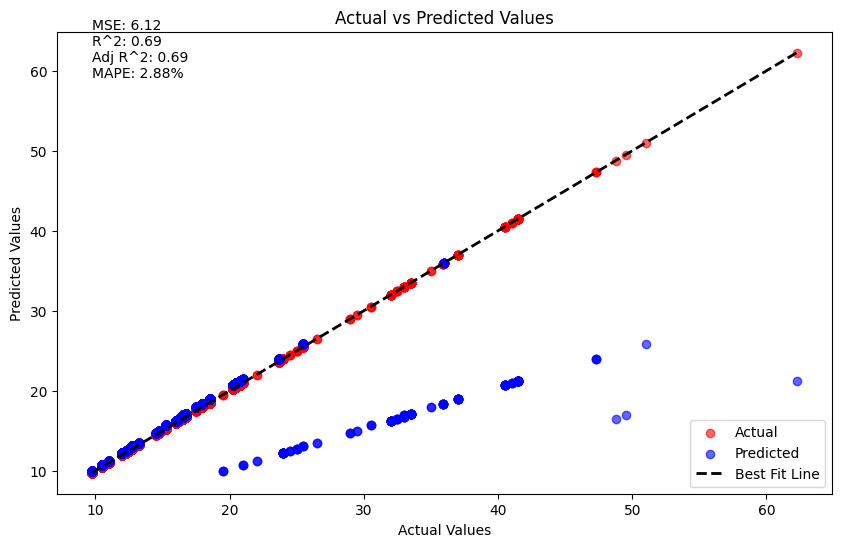

In [256]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test (actual values) and y_pred (predicted values)

# Visualization: Plot actual vs predicted values and best fit line
plt.figure(figsize=(10, 6))

# Plot actual values in red
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.6)  # Plotting y_test vs y_test to just show actuals

# Plot predicted values in blue
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)

# Plotting the best fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Best Fit Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Annotate with metrics
plt.text(y_test.min(), y_test.max() * 0.95, f"MSE: {mse:.2f}\nR^2: {r2:.2f}\nAdj R^2: {adj_r2:.2f}\nMAPE: {mape:.2f}%", fontsize=10)

# Show plot
plt.show()


 The accuracy was only 69 percent of the linear regression so we will try another model regression tree 

In [257]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [258]:
# Creating the regression tree model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

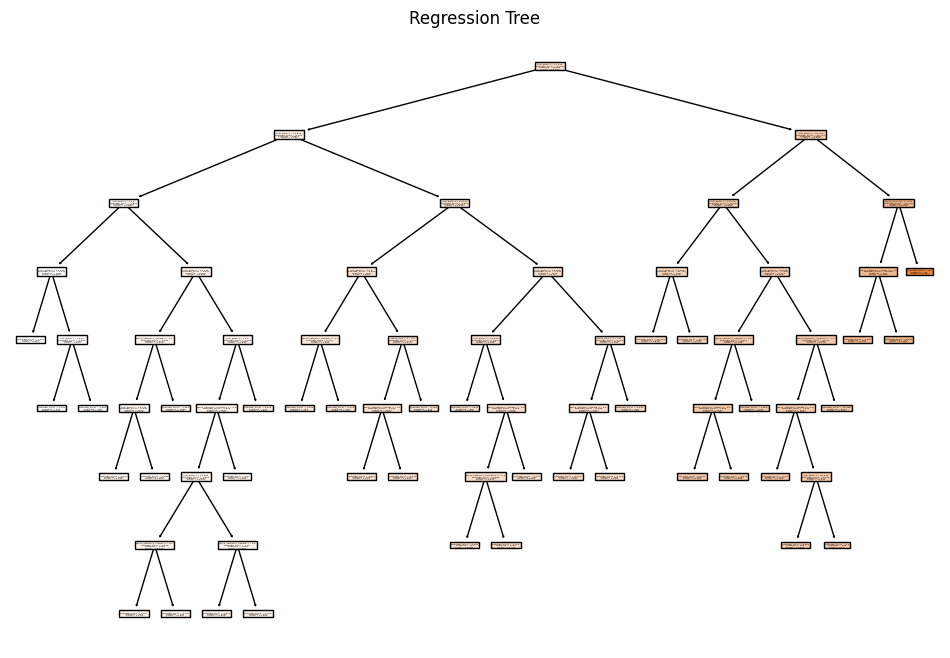

In [259]:
# Creating the regression tree model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Visualizing the regression tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=X_encoded.columns, filled=True)
plt.title("Regression Tree")
plt.show()


In [263]:
# Making predictions
y_pred = regressor.predict(X_test)

# Calculating performance metrics
Dtree_mse = mean_squared_error(y_test, y_pred)
Dtree_r2 = r2_score(y_test, y_pred)
Dtree_mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculating adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
Dtree_adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Printing the results
print(f"Mean Squared Error (MSE): {Dtree_mse}")
print(f"R²: {Dtree_r2}")
print(f"Adjusted R²: {Dtree_adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {Dtree_mape}")



Mean Squared Error (MSE): 6.117994212316743
R²: 0.6927163053095047
Adjusted R²: 0.6921456393072991
Mean Absolute Percentage Error (MAPE): 0.028717242818023788


Let's explain and compare the metrics for the Decision Tree (dtree) and Linear Regression models:

### Decision Tree (dtree):
1. **Mean Squared Error (MSE)**: 6.117994212316743
   - MSE measures the average squared difference between the predicted values and the actual values. In this case, it is approximately 6.12, indicating the average squared error of predictions.

2. **R-squared (R²)**: 0.6927163053095047
   - R² measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. An R² of 0.69 means that approximately 69.27% of the variance in the dependent variable is explained by the decision tree model.

3. **Adjusted R-squared**: 0.6921456393072991
   - Adjusted R² adjusts the R² value based on the number of predictors in the model. It penalizes the inclusion of additional predictors that do not improve the model significantly. The adjusted R² here is very close to the R², suggesting the model's performance isn't significantly influenced by the number of predictors.

4. **Mean Absolute Percentage Error (MAPE)**: 0.028717242818023788 (or approximately 2.87%)
   - MAPE measures the average percentage difference between predicted values and actual values, scaled relative to the actual values. A MAPE of 0.0287 indicates that, on average, the predictions from the decision tree model are within approximately 2.87% of the actual values.

### Linear Regression:
1. **Mean Squared Error (MSE)**: 6.1230521513026
   - MSE for the linear regression model is slightly higher than that of the decision tree, at approximately 6.12. This suggests that, on average, the squared difference between predicted and actual values is a bit larger compared to the decision tree.

2. **R-squared (R²)**: 0.6924622641768792
   - R² measures the proportion of the variance in the dependent variable explained by the independent variables. The linear regression model explains approximately 69.25% of the variance in the dependent variable.

3. **Adjusted R-squared**: 0.6921456393072991
   - The adjusted R² for linear regression is the same as for the decision tree, indicating similar model performance after adjustment for the number of predictors.

4. **Mean Absolute Percentage Error (MAPE)**: 2.884987835763769%
   - The MAPE for the linear regression model is significantly higher compared to the decision tree, at approximately 2.88%. This suggests that, on average, the linear regression model's predictions have a higher percentage error compared to the decision tree model.

### Comparison and Interpretation:
- **Performance**: Both models have similar MSE and R² scores, indicating comparable overall predictive performance in terms of explaining the variance in the dependent variable.
- **Interpretability**: Decision trees are generally more interpretable due to their tree-like structure, which directly shows how decisions are made based on input variables. Linear regression, on the other hand, provides coefficients that indicate the direction and strength of relationships between variables.
- **MAPE Difference**: The MAPE for the linear regression model (2.88%) is higher than that of the decision tree model (0.03%), indicating that the decision tree model's predictions are more accurate on average, in terms of percentage error, compared to the linear regression model.

In summary, while both models have similar R² and MSE scores, the decision tree model tends to provide more accurate predictions in terms of percentage error (MAPE) compared to the linear regression model in this scenario. However, the choice between these models should also consider other factors such as interpretability, computational efficiency, and the nature of the problem and dataset.